In [5]:
import geopandas as gpd

In [3]:
gpf = gpd.read_file('Tract.shp')

<AxesSubplot:>

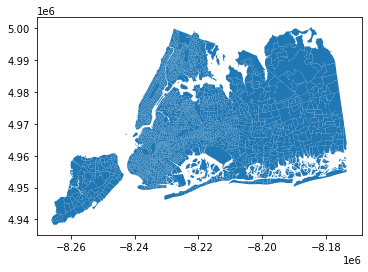

In [4]:
gpf.plot()

In [13]:
gpf.head()
cols = ['GEOID','County','geometry']

In [14]:
gpf_slim = gpf[cols]

In [15]:
gpf_slim.head()

,GEOID,County,geometry
0,36005000100,Bronx County,"POLYGON ((-8223304.523 4981044.586, -8223307.3..."
1,36005000200,Bronx County,"POLYGON ((-8221503.700 4983296.896, -8221648.4..."
2,36005000400,Bronx County,"MULTIPOLYGON (((-8221072.012 4985004.760, -822..."
3,36005001600,Bronx County,"POLYGON ((-8221516.289 4986187.406, -8221497.4..."
4,36005001900,Bronx County,"MULTIPOLYGON (((-8226302.917 4982445.645, -822..."


<AxesSubplot:>

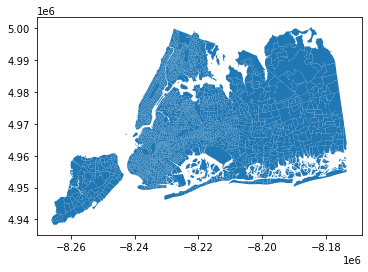

In [16]:
gpf_slim.plot()

In [17]:
gpf_slim.to_file('nyc_census.geojson',driver='GeoJSON')

In [18]:
gpf_slim['County'].unique()

array(['Bronx County', 'Kings County', 'Nassau County', 'New York County',
       'Queens County', 'Richmond County'], dtype=object)

In [19]:
gpf_slim['first_4_digits'] = gpf_slim['GEOID'].apply(lambda s: str(s[0:4]))

/Users/shai/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [20]:
gpf_slim['first_4_digits'] 

0       3600
1       3600
2       3600
3       3600
4       3600
        ... 
2438    3608
2439    3608
2440    3608
2441    3608
2442    3608
Name: first_4_digits, Length: 2443, dtype: object

In [23]:
gpf_slim[['first_4_digits','County']].drop_duplicates()

,first_4_digits,County
0,3600,Bronx County
339,3604,Kings County
1099,3605,Nassau County
1378,3606,New York County
1666,3608,Queens County
2334,3608,Richmond County


In [27]:
gpf_slim['boro'] = gpf_slim['GEOID'].apply(lambda s: str(s[4:8]))

/Users/shai/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [30]:
gpf_slim.to_file('census_nyc_playing.geojson',driver='GeoJSON')

In [2]:
play = gpd.read_file('Source/census_nyc_playing.geojson')

In [6]:
play.head()


,GEOID,County,first_4_digits,boro,geometry
0,36005000100,Bronx County,3600,5000,"POLYGON ((-8223304.523 4981044.586, -8223307.3..."
1,36005000200,Bronx County,3600,5000,"POLYGON ((-8221503.700 4983296.896, -8221648.4..."
2,36005000400,Bronx County,3600,5000,"MULTIPOLYGON (((-8221072.012 4985004.760, -822..."
3,36005001600,Bronx County,3600,5001,"POLYGON ((-8221516.289 4986187.406, -8221497.4..."
4,36005001900,Bronx County,3600,5001,"MULTIPOLYGON (((-8226302.917 4982445.645, -822..."
